In [1]:
import pandas as pd
import random 
import numpy as np

customers_bank = [f"c_{i}" for i in range(1, 16)]
ids_bank = [f"id_{i}" for i in range(1, 16)]

d_bank = dict(zip(ids_bank, customers_bank))
ids = random.choices(list(d_bank.keys()), k=50)
customers = [d_bank[i] for i in ids]

days = [random.randint(1, 28) for i in range(50)]
mon = [random.randint(1, 12) for i in range(50)]
val = [round(random.uniform(-15.00, 15.00), 2) for i in range(50)] # no randfloat

data = {
    "customer_name" : customers  ,
    "customer_id" : ids,
    "day" : days, 
    "month":  mon,
    "value" : val

}

data = pd.DataFrame(data)
print (data.head())

data.to_csv("daily_entries.csv", index = False)


  customer_name customer_id  day  month  value
0           c_5        id_5   15      7   3.62
1           c_9        id_9   16      4  -4.43
2           c_5        id_5   26      8   9.51
3           c_6        id_6   25      4  10.44
4          c_11       id_11   25     10  -6.04


In [2]:
def groupby_month(df):
    monthly_sum = df.groupby(["customer_name", "customer_id","month"])["value"].sum()
    print(monthly_sum)
    return monthly_sum.reset_index()

monthly_df =groupby_month(data)
monthly_df.to_csv("monthly_balances.csv", index = False)


# group all data for month

customer_name  customer_id  month
c_1            id_1         2         4.50
                            3        12.64
                            10      -10.78
c_10           id_10        3        12.77
                            4         5.18
c_11           id_11        3        13.24
                            5        10.87
                            7        -1.86
                            9        -1.21
                            10       -6.04
                            12        5.69
c_12           id_12        6         4.16
                            9         0.60
c_13           id_13        10        9.20
c_14           id_14        1        13.27
                            3        12.31
                            11      -18.60
                            12       -2.10
c_15           id_15        4        10.08
                            10       12.68
c_2            id_2         3       -10.96
                            5       -15.60
                    

In [3]:
def add_nan(df):
    temp = df.copy()
    for i in range(int(0.1*df.size)):
        row = random.randint(0, df.shape[0]-1)
        col = random.randint(0, df.shape[1]-1)
        temp.iat[row, col] = np.nan
    return temp
data_with_nan = add_nan(data)
data_with_nan.to_csv("daily_entries_2.csv", index = False)


# make anoher dataset

In [4]:
def updating_csv(csv1, csv2 = "monthly_balances.csv"):
    df1 = pd.read_csv(csv1)

    x = groupby_month(df1)

    x.to_csv(csv2, index = False)

    return x

#updating monthlybal with another dataset

def combine_df(csv1, csv2):
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)

    combined = pd.concat ([df1, df2], ignore_index=True)
    combined.to_csv("daily_entries_total.csv", index = False)

    return combined 


x = updating_csv("daily_entries_2.csv", "monthly_balances.csv")

cdf = combine_df("daily_entries.csv", "daily_entries_2.csv")




print(cdf)
    

customer_name  customer_id  month
c_1            id_1         2.0       4.50
                            3.0      12.64
                            10.0    -10.78
c_10           id_10        4.0       5.18
c_11           id_11        5.0      10.87
                            7.0     -13.07
                            10.0     -6.04
                            12.0      5.69
c_12           id_12        9.0       0.60
c_14           id_14        1.0      13.27
                            3.0      12.31
                            11.0     -6.78
                            12.0     -2.10
c_15           id_15        4.0      10.08
                            10.0     12.68
c_2            id_2         3.0     -10.96
                            5.0     -15.60
                            6.0       3.45
                            10.0     10.06
c_3            id_3         6.0      11.48
                            8.0       0.00
c_5            id_5         2.0       0.82
                    

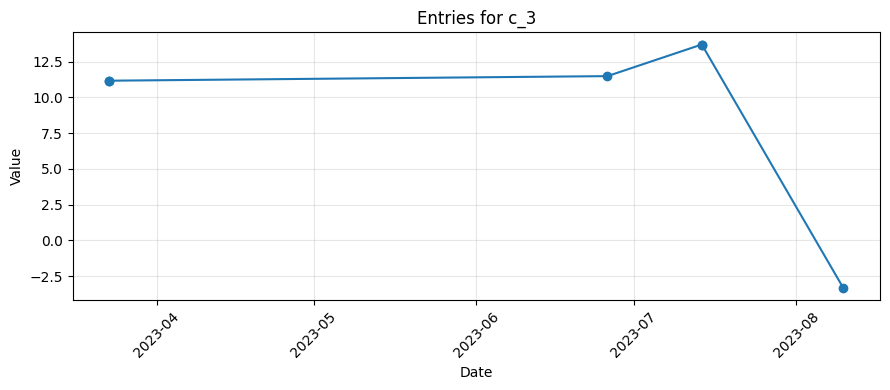

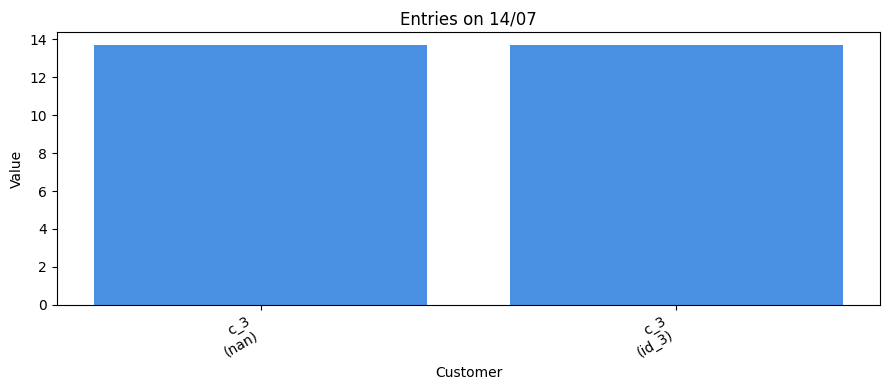

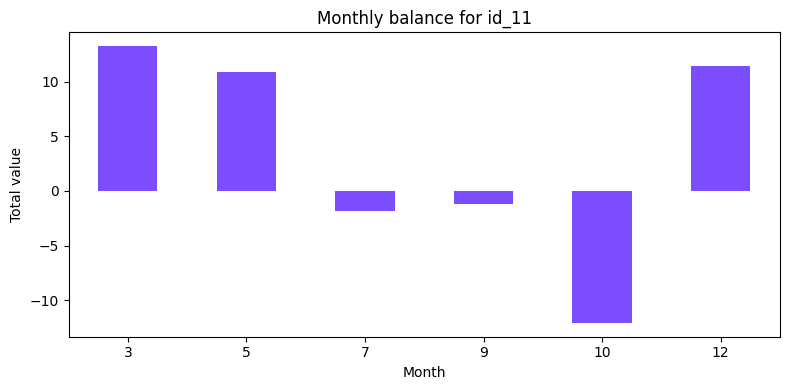

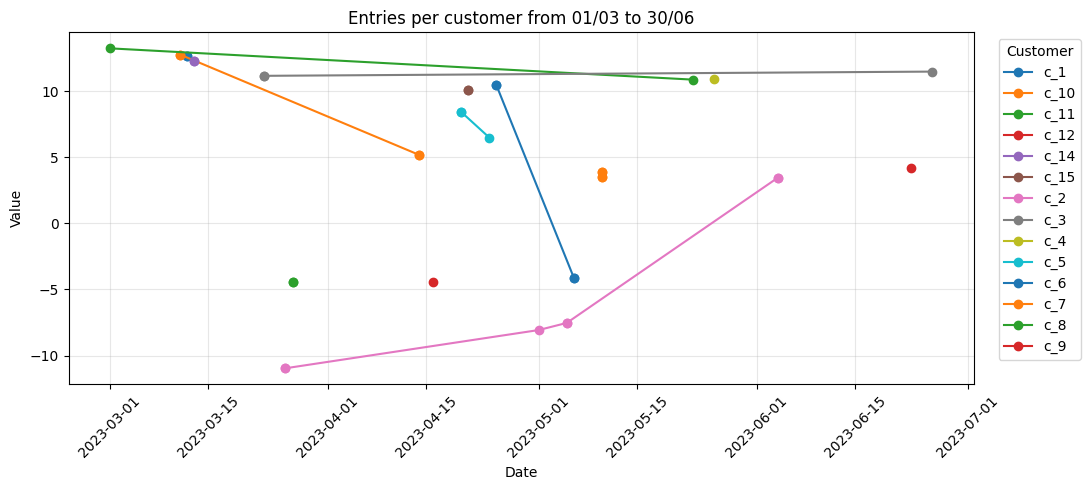

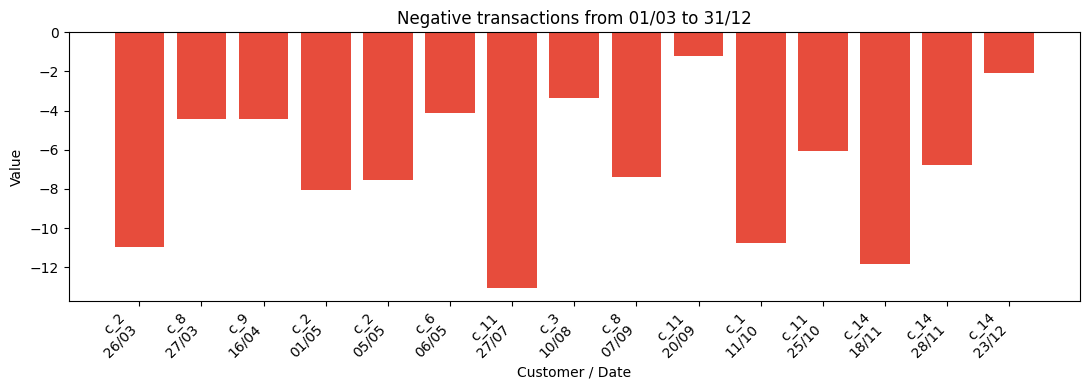

In [14]:
import matplotlib.pyplot as plt
from datetime import datetime

# Load the combined entries once so every plot uses the same data
entries = pd.read_csv("daily_entries_total.csv")
entries = entries.copy()
entries["day"] = pd.to_numeric(entries["day"], errors="coerce")
entries["month"] = pd.to_numeric(entries["month"], errors="coerce")
entries["value"] = pd.to_numeric(entries["value"], errors="coerce")
entries = entries.dropna(subset=["day", "month", "value"])
entries["day"] = entries["day"].astype(int)
entries["month"] = entries["month"].astype(int)
entries["date"] = pd.to_datetime({
    "year": 2023,
    "month": entries["month"],
    "day": entries["day"],
}, errors="coerce")
entries = entries.dropna(subset=["date"]).sort_values("date")


def plot_customer_entries(identifier: str) -> None:
    """Plot every entry for a customer name or id."""
    mask = (entries["customer_name"] == identifier) | (entries["customer_id"] == identifier)
    customer_rows = entries[mask].sort_values("date")
    if customer_rows.empty:
        print(f"No entries for customer '{identifier}'.")
        return

    plt.figure(figsize=(9, 4))
    plt.plot(customer_rows["date"], customer_rows["value"], marker="o")
    plt.title(f"Entries for {identifier}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_day_entries(month: int, day: int) -> None:
    """Plot all entries recorded on a given day (month + day)."""
    same_day = entries[(entries["month"] == month) & (entries["day"] == day)]
    if same_day.empty:
        raise Exception(f"No entries found on {day:02d}/{month:02d}.")

    labels = [f"{row.customer_name}\n({row.customer_id})" for row in same_day.itertuples()]
    plt.figure(figsize=(9, 4))
    plt.bar(labels, same_day["value"], color="#4a90e2")
    plt.title(f"Entries on {day:02d}/{month:02d}")
    plt.xlabel("Customer")
    plt.ylabel("Value")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


def plot_customer_balance_per_month(identifier: str) -> None:
    """Show the monthly balance (sum of values) for one customer."""
    mask = (entries["customer_name"] == identifier) | (entries["customer_id"] == identifier)
    monthly = entries[mask].groupby("month")["value"].sum().sort_index()
    if monthly.empty:
        print(f"No monthly data for '{identifier}'.")
        return

    plt.figure(figsize=(8, 4))
    monthly.plot(kind="bar", color="#7c4dff")
    plt.title(f"Monthly balance for {identifier}")
    plt.xlabel("Month")
    plt.ylabel("Total value")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_entries_in_period(start_month: int, start_day: int, end_month: int, end_day: int) -> None:
    """Plot every entry within a date window, one line per customer."""
    start_date = datetime(2023, start_month, start_day)
    end_date = datetime(2023, end_month, end_day)
    window = entries[(entries["date"] >= start_date) & (entries["date"] <= end_date)]
    if window.empty:
        print(f"No entries between {start_date:%d/%m} and {end_date:%d/%m}.")
        return

    plt.figure(figsize=(11, 5))
    for name, group in window.groupby("customer_name"):
        plt.plot(group["date"], group["value"], marker="o", label=name)
    plt.title(f"Entries per customer from {start_date:%d/%m} to {end_date:%d/%m}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Customer", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


def plot_negative_transactions_in_period(start_month: int, start_day: int, end_month: int, end_day: int) -> None:
    """Plot all negative transactions inside a date window."""
    start_date = datetime(2023, start_month, start_day)
    end_date = datetime(2023, end_month, end_day)
    negatives = entries[(entries["date"] >= start_date) & (entries["date"] <= end_date) & (entries["value"] < 0)]
    if negatives.empty:
        print(f"No negative transactions between {start_date:%d/%m} and {end_date:%d/%m}.")
        return

    labels = [f"{row.customer_name}\n{row.date:%d/%m}" for row in negatives.itertuples()]
    plt.figure(figsize=(11, 4))
    plt.bar(labels, negatives["value"], color="#e74c3c")
    plt.title(f"Negative transactions from {start_date:%d/%m} to {end_date:%d/%m}")
    plt.xlabel("Customer / Date")
    plt.ylabel("Value")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Example usage 
plot_customer_entries("c_3")
plot_day_entries(7, 14)
plot_customer_balance_per_month("id_11")
plot_entries_in_period(3, 1, 6, 30)
plot_negative_transactions_in_period(3, 1, 12, 31)

In [ ]:
# UML code for part 4 D
# to generate diagram, use any platform of ur choosing like draw.io -> arrange - > insert - > advanced -> plantuml then paste this code
# alternatively, u can just learn how to read this code and draw on paper
"""
@startuml
class Model {
  +groupby_month(df)
  +add_nan(df)
  +combine_df(csv1, csv2)
  +updating_csv(csv1, csv2="monthly_balances.csv")
}

class View {
  +plot_customer_entries(identifier)
  +plot_day_entries(month, day)
  +plot_customer_balance_per_month(identifier)
  +plot_entries_in_period(start_month, start_day, end_month, end_day)
  +plot_negative_transactions_in_period(start_month, start_day, end_month, end_day)
}

class Controller {
  +build_initial_dataset()
  +inject_missing_data()
  +refresh_monthly_balances()
  +visualise_customer(identifier)
  +visualise_period(start, end)
}

Controller --> Model : read/write CSVs, aggregate data
Controller --> View  : supply filtered DataFrames
View --> Model       : relies on prepared data columns
@enduml
"""

SyntaxError: invalid syntax (663269194.py, line 4)